In [2]:
library(iSensor)
library(Seurat)
library(ggplot2)

In [4]:
ls("package:iSensor")

[1] "add_defaultPanels"        "add_iSensor_data"        
 [3] "add_iSensor_labels"       "add_iSensor_panelSet"    
 [5] "add_iSensor_random_panel" "add_iSensor_workPanel"   
 [7] "create_iSensor"           "iSensor_pipeline"        
 [9] "iSensor_signal"           "read_genePanels"         
[11] "set_iSensor_workPanel"

In [233]:
plot_heatmap_with_stats <- function(matrix_data, group_labels = list(control = "control", treat = "treat"), title = "", tmpGrad, zero = 1) {
  # Проверка и установка имен
  if (is.null(rownames(matrix_data))) rownames(matrix_data) <- paste0("Row", 1:nrow(matrix_data))
  if (is.null(colnames(matrix_data))) colnames(matrix_data) <- paste0("V", 1:ncol(matrix_data))

    if (tmpGrad == 1) {
        tmpGrad <- scale_fill_gradient(
            name = "Значение",
            low = "white", 
            high = "steelblue",
            na.value = NA
        )
    } else if (tmpGrad == 2) {
        tmpGrad <- scale_fill_gradient2(
            name = "Значение",
            low = "blue",
            mid = "white",
            high = "red",
            midpoint = zero,#(min(matrix_data) + max(matrix_data))/2,
            na.value = NA
        )
    }
  
  # Автоматическое определение групп по ключевым словам в названиях колонок
  control_cols <- grep(group_labels$control, colnames(matrix_data), value = TRUE)
  treat_cols <- grep(group_labels$treat, colnames(matrix_data), value = TRUE)
  
  if (length(control_cols) == 0 || length(treat_cols) == 0) {
    stop("Не найдены колонки для указанных групп")
  }
  
  # Упорядочиваем колонки
  ordered_cols <- c(treat_cols, control_cols)
  matrix_data <- matrix_data[, ordered_cols]
  
  # Создаем основной data.frame
  melt_matrix <- function(mat) {
    data.frame(
      Row = rep(rownames(mat), ncol(mat)),
      Variable = factor(rep(colnames(mat), each = nrow(mat)), levels = colnames(mat)),
      Value = as.vector(mat),
      stringsAsFactors = FALSE
    )
  }
  
  # Основные данные и статистика
  df_main <- melt_matrix(matrix_data)
  
  stats <- data.frame(
    Row = rownames(matrix_data),
    # Mean = rowMeans(matrix_data),
      Mean = rowMeans(matrix_data[, control_cols]),
    # Variance = apply(matrix_data, 1, var),
      Variance = apply(matrix_data[, control_cols], 1, var),
    stringsAsFactors = FALSE
  )
  
  df_stats <- data.frame(
    Row = rep(stats$Row, 2),
    Variable = rep(c("Mean", "Variance"), each = nrow(stats)),
    Value = c(stats$Mean, stats$Variance),
    stringsAsFactors = FALSE
  )
  
  # Объединенные данные
  all_data <- rbind(
    cbind(df_main, Type = "Data"),
    cbind(df_stats, Type = "Stats")
  )
  
  # Порядок отображения
  x_levels <- c(colnames(matrix_data), "Mean", "Variance")

  # Создаем график
  ggplot(all_data, aes(x = factor(Variable, levels = x_levels), y = Row)) +
    geom_tile(aes(fill = ifelse(Type == "Data", Value, NA)), color = "white") +
    geom_tile(
      data = subset(all_data, Type == "Stats"),
      fill = "gray90", 
      width = 0.9, 
      height = 0.9
    ) +
    geom_text(
      aes(label = ifelse(Type == "Data", "", sprintf("%.2f", Value))),
      color = "black",
      size = 3.5
    ) +
    # Вертикальная разделительная линия между группами
    geom_vline(
      xintercept = length(treat_cols) + 0.5, 
      color = "red", 
      linewidth = 1, 
      linetype = "dashed"
    ) +
    tmpGrad +  
    scale_x_discrete(
      labels = c(colnames(matrix_data), "Mean contr", "Var contr")
        # labels = c(rep("", ncol(matrix_data)), "Mean contr", "Var contr")
    ) +
    labs(title = title, x = "", y = "") +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
      panel.grid = element_blank(),
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
    )
}

In [5]:
plot_heatmap_with_no_stats <- function(matrix_data, group_labels = list(control = "control", treat = "treat"), title = "", tmpGrad, zero = 1) {
  # Проверка и установка имен
  if (is.null(rownames(matrix_data))) rownames(matrix_data) <- paste0("Row", 1:nrow(matrix_data))
  if (is.null(colnames(matrix_data))) colnames(matrix_data) <- paste0("V", 1:ncol(matrix_data))

    if (tmpGrad == 1) {
        tmpGrad <- scale_fill_gradient(
            name = "Значение",
            low = "white", 
            high = "steelblue",
            na.value = NA
        )
    } else if (tmpGrad == 2) {
        tmpGrad <- scale_fill_gradient2(
            name = "Значение",
            low = "blue",
            mid = "white",
            high = "red",
            midpoint = zero,#(min(matrix_data) + max(matrix_data))/2,
            na.value = NA
        )
    }
  
  # Автоматическое определение групп по ключевым словам в названиях колонок
  control_cols <- grep(group_labels$control, colnames(matrix_data), value = TRUE)
  treat_cols <- grep(group_labels$treat, colnames(matrix_data), value = TRUE)
  
  if (length(control_cols) == 0 || length(treat_cols) == 0) {
    stop("Не найдены колонки для указанных групп")
  }
  
  # Упорядочиваем колонки
  ordered_cols <- c(treat_cols, control_cols)
  matrix_data <- matrix_data[, ordered_cols]
  
  # Создаем основной data.frame
  melt_matrix <- function(mat) {
    data.frame(
      Row = rep(rownames(mat), ncol(mat)),
      Variable = factor(rep(colnames(mat), each = nrow(mat)), levels = colnames(mat)),
      Value = as.vector(mat),
      stringsAsFactors = FALSE
    )
  }
  
  # Основные данные и статистика
  df_main <- melt_matrix(matrix_data)
  
  
  # Объединенные данные
  all_data <- cbind(df_main, Type = "Data")
  
  # Порядок отображения
  x_levels <- c(colnames(matrix_data))

  # Создаем график
  ggplot(all_data, aes(x = factor(Variable, levels = x_levels), y = Row)) +
    geom_tile(aes(fill = ifelse(Type == "Data", Value, NA)), color = "white") +
    geom_text(
      aes(label = ifelse(Type == "Data", "", sprintf("%.2f", Value))),
      color = "black",
      size = 3.5
    ) +
    # Вертикальная разделительная линия между группами
    geom_vline(
      xintercept = length(treat_cols) + 0.5, 
      color = "red", 
      linewidth = 1, 
      linetype = "dashed"
    ) +
    tmpGrad +  
    # scale_x_discrete(
    #   labels = c(colnames(matrix_data), "Mean contr", "Var contr")
    #     # labels = c(rep("", ncol(matrix_data)), "Mean contr", "Var contr")
    # ) +
    labs(title = title, x = "", y = "") +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
      panel.grid = element_blank(),
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
    )
}

In [3]:
plot_heatmap_with_no_stats <- function(matrix_data, group_labels = list(control = "control", treat = "treat"), title = "", tmpGrad, zero = 1) {
  # Проверка и установка имен
  if (is.null(rownames(matrix_data))) rownames(matrix_data) <- paste0("Row", 1:nrow(matrix_data))
  if (is.null(colnames(matrix_data))) colnames(matrix_data) <- paste0("V", 1:ncol(matrix_data))
  
  # Принудительно делаем имена строк и колонок уникальными и строковыми
  rownames(matrix_data) <- make.unique(as.character(rownames(matrix_data)))
  colnames(matrix_data) <- make.unique(as.character(colnames(matrix_data)))
  
  if (tmpGrad == 1) {
    tmpGrad <- scale_fill_gradient(
      name = "Значение",
      low = "white", 
      high = "steelblue",
      na.value = NA
    )
  } else if (tmpGrad == 2) {
    tmpGrad <- scale_fill_gradient2(
      name = "Значение",
      low = "#4575b4",
      mid = "white",
      high = "#d73027",
      midpoint = zero,
      na.value = NA
    )
  }
  
  # Автоматическое определение групп
  control_cols <- grep(group_labels$control, colnames(matrix_data), value = TRUE)
  treat_cols <- grep(group_labels$treat, colnames(matrix_data), value = TRUE)
  
  if (length(control_cols) == 0 || length(treat_cols) == 0) {
    stop("Не найдены колонки для указанных групп")
  }
  
  # Упорядочиваем колонки
  ordered_cols <- c(control_cols, treat_cols)
  matrix_data <- matrix_data[, ordered_cols, drop = FALSE]  # drop=FALSE на случай одной колонки
  
  # Создаем основной data.frame (исправленный вариант)
  melt_matrix <- function(mat) {
    data.frame(
      Row = rep(rownames(mat), ncol(mat)),
      Variable = factor(rep(colnames(mat), each = nrow(mat)), levels = unique(colnames(mat))),
      Value = as.vector(mat),
      stringsAsFactors = FALSE
    )
  }
  
  df_main <- melt_matrix(matrix_data)
  all_data <- cbind(df_main, Type = "Data")
  
  # График
  ggplot(all_data, aes(x = Variable, y = Row, fill = Value)) +
    geom_tile(color = "white") +
    geom_vline(xintercept = length(treat_cols) + 0.5, color = "red", linewidth = 1, linetype = "dashed") +
    tmpGrad +
    labs(title = title, x = "", y = "") +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
      panel.grid = element_blank(),
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
    )
}

In [262]:
plot_heatmap_with_no_stats <- function(
    matrix_data, 
    group_labels = list(control = "control", treat = "treat"), 
    title = "", 
    tmpGrad = 1,  # 1 = монохром, 2 = двуцветный, 3 = RColorBrewer
    zero = 1,      # midpoint для tmpGrad=2
    brewer_palette = "RdYlBu"  # Название палитры из RColorBrewer
) {
  # Проверка и установка имён
  if (is.null(rownames(matrix_data))) rownames(matrix_data) <- paste0("Row", 1:nrow(matrix_data))
  if (is.null(colnames(matrix_data))) colnames(matrix_data) <- paste0("V", 1:ncol(matrix_data))
  
  # Уникальные имена
  rownames(matrix_data) <- make.unique(as.character(rownames(matrix_data)))
  colnames(matrix_data) <- make.unique(as.character(colnames(matrix_data)))
  
  # Автоматическое определение групп
  control_cols <- grep(group_labels$control, colnames(matrix_data), value = TRUE)
  treat_cols <- grep(group_labels$treat, colnames(matrix_data), value = TRUE)
  
  if (length(control_cols) == 0 || length(treat_cols) == 0) {
    stop("Не найдены колонки для указанных групп")
  }
  
  # Упорядочивание колонок
  ordered_cols <- c(control_colsб treat_cols)
  matrix_data <- matrix_data[, ordered_cols, drop = FALSE]
  
  # Преобразование в long-формат
  melt_matrix <- function(mat) {
    data.frame(
      Row = rep(rownames(mat), ncol(mat)),
      Variable = factor(rep(colnames(mat), each = nrow(mat)), levels = unique(colnames(mat))),
      Value = as.vector(mat),
      stringsAsFactors = FALSE
    )
  }
  
  df_main <- melt_matrix(matrix_data)
  
  # Создаём базовый график
  p <- ggplot(df_main, aes(x = Variable, y = Row, fill = Value)) +
    geom_tile(color = "white") +
    geom_vline(
      xintercept = length(treat_cols) + 0.5, 
      color = "red", 
      linewidth = 1, 
      linetype = "dashed"
    ) +
    labs(title = title, x = "", y = "") +
    theme_minimal() +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
      panel.grid = element_blank(),
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
    )
  
  # Добавляем выбранный градиент
  if (tmpGrad == 1) {
    p <- p + scale_fill_gradient(
      name = "Значение",
      low = "white", 
      high = "steelblue",
      na.value = NA
    )
  } else if (tmpGrad == 2) {
    p <- p + scale_fill_gradient2(
      name = "Значение",
      low = "blue",
      mid = "white",
      high = "red",
      midpoint = zero,
      na.value = NA
    )
  } else if (tmpGrad == 3) {
    if (!requireNamespace("RColorBrewer", quietly = TRUE)) {
      stop("Пакет 'RColorBrewer' не установлен. Используйте install.packages('RColorBrewer')")
    }
    p <- p + scale_fill_gradientn(
      name = "Значение",
      colours = RColorBrewer::brewer.pal(11, brewer_palette),
      na.value = NA,
      limits = c(min(matrix_data), max(matrix_data))
    )
  } else {
    stop("Недопустимое значение tmpGrad. Используйте 1, 2 или 3.")
  }
  
  return(p)
}

In [50]:
calculate_stats <- function(data_matrix) {
  # Проверяем, что входные данные - матрица или data.frame
  # if (!is.matrix(data_matrix) {
  #   if (is.data.frame(data_matrix)) {
  #     data_matrix <- as.matrix(data_matrix)
  #   } else {
  #     stop("Input must be a matrix or data.frame")
  #   }
  # }
  
  # Находим колонки control и treat
  control_cols <- grep("control", colnames(data_matrix), ignore.case = TRUE, value = TRUE)
  treat_cols <- grep("treat", colnames(data_matrix), ignore.case = TRUE, value = TRUE)
  
  if (length(control_cols) == 0 || length(treat_cols) == 0) {
    stop("Columns with 'control' or 'treat' not found")
  }
  
  # Вычисляем статистики для каждой строки
  results <- data.frame(
    row.names = rownames(data_matrix),
    
    # 1) p-value из теста Вилкоксона
    wilcox_pvalue = apply(data_matrix, 1, function(row) {
      wilcox.test(
        x = row[control_cols],
        y = row[treat_cols],
        exact = TRUE  # FALSE для больших выборок
      )$p.value
    }),
    
    # 2) Разность средних (treat - control)
    mean_diff = rowMeans(data_matrix[, treat_cols]) - rowMeans(data_matrix[, control_cols]),
    
    # 3) Отношение средних (treat / control)
    fold_change = rowMeans(data_matrix[, treat_cols]) / rowMeans(data_matrix[, control_cols])
  )
  
  # Добавляем FDR-поправку (опционально)
  # results$fdr <- p.adjust(results$wilcox_pvalue, method = "fdr")
  
  return(results)
}

In [4]:
dataDir <- 'Auxin_transcriptoms/microarrays/seurat_auxin_microarrays_no_cb.rds'

In [5]:
seurat_obj <- readRDS(dataDir)

In [6]:
expression_data <- as.matrix(GetAssayData(seurat_obj, layer = "data"))
#Expression data contains NaN, changing them to 0:
expression_data[is.nan(expression_data)] <- 0

In [7]:
expression_data[1:5, 1:3]

,control_1_auxin_leaves_72h_romero-puertas,control_2_auxin_leaves_72h_romero-puertas,control_3_auxin_leaves_72h_romero-puertas
AT1G01010,0.4053318,0.3946465,0.3834890
AT1G01030,0.2784287,0.2607292,0.2728550
AT1G01040,0.4173201,0.4258987,0.4034545
AT1G01050,0.5464951,0.5477811,0.5418857
AT1G01060,0.4523973,0.4525704,0.4330149


In [8]:
iSensor_test <- create_iSensor(data = expression_data, species = NULL, hormone = NULL, type = NULL)
iSensor_test <- set_iSensor_workPanel(iSensor_test, names(iSensor_test$genePanelSets)[1])
iSensor_test <- add_iSensor_random_panel(iSensor_test, randNum=2, randSize=c(100, 1000),
                                         majortrend = TRUE)

In [9]:
iSensor_test <- iSensor_signal(iSensor_test, transform = 'mean', normed = TRUE, metaPanels = NULL)

  |==================================================| 100%
mean_normed signal was calculated


In [11]:
panelsForPic1 <- c('AT_aux_trans_A-ARF', 'AT_aux_trans_ARF', 'AT_aux_trans_EffluxInflux', 'AT_aux_trans_Receptors', 'AT_aux_trans_Synthesis',
  'AT_aux_trans_Transport', 'AT_aux_trans_IAA', 'AT_aux_cis_DR5(TGTCNN)', 'AT_aux_cis_IR8(TGTCNN)', 'AT_aux_cistrans_DR5(TGTCNN)up',
  'AT_aux_cistrans_DR5(TGTCNN)down', 'AT_aux_cistrans_IR8(TGTCNN)up', 'AT_aux_cistrans_IR8(TGTCNN)down', 'random1')

In [12]:
panelsForPic1 %in% names(iSensor_test$genePanels)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [13]:
iSensor_test <- iSensor_signal(iSensor_test, transform = 'mean', normed = TRUE, panels = panelsForPic1,
                               normBy = 'cols', doParallel = FALSE)

  |==================================================| 100%
mean_normed signal was calculated


In [13]:
names(iSensor_test)

[1] "exprData"      "genePanels"    "Signals"       "sampleLabels" 
[5] "importance"    "genePanelSets" "metaData"

In [36]:
transPanels <- sapply(rownames(t(iSensor_test$Signals$mean_normed)), function(x) {
    if ('trans' %in% strsplit(x, '_')[[1]]) return(TRUE) else return(FALSE)
})
cisPanels <- sapply(rownames(t(iSensor_test$Signals$mean_normed)), function(x) {
    if ('cis' %in% strsplit(x, '_')[[1]]) return(TRUE) else return(FALSE)
})
cistransPanels <- sapply(rownames(t(iSensor_test$Signals$mean_normed)), function(x) {
    if ('cistrans' %in% strsplit(x, '_')[[1]]) return(TRUE) else return(FALSE)
})
otherPanels <- rownames(t(iSensor_test$Signals$mean_normed)) %in% c('majortrend', 'random1', 'random2')

In [37]:
dim(t(iSensor_test$Signals$mean_normed)[c(transPanels | cisPanels | cistransPanels | otherPanels),])

[1]  64 114

In [38]:
signalType <- 'mean_normed'

In [39]:
plot_heatMap <- plot_heatmap_with_no_stats(t(iSensor_test$Signals$mean_normed)[c(transPanels | cisPanels | cistransPanels | otherPanels),],
                                        group_labels = list(control = "control", treat = "treat"),
                                        title = signalType, tmpGrad=2, zero = 1)

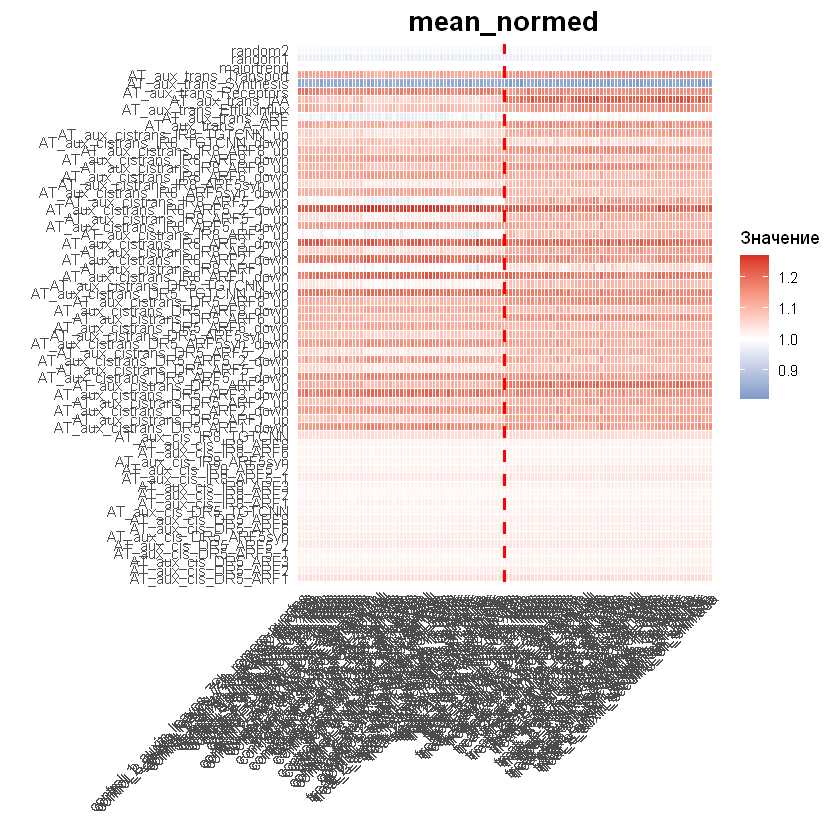

In [40]:
plot_heatMap

In [27]:
illustr_dir <- 'illustrations/'

In [28]:
paste0(illustr_dir, '4/', 'heatmap.png')

[1] "illustrations/4/heatmap.png"

In [29]:
ggsave(paste0(illustr_dir, '4/', 'heatmap_11.png'), 
       plot = plot_heatMap,
       width = 12,        # Ширина в дюймах (можно увеличить для большего места)
       height = 15,        # Высота в дюймах
       dpi = 300,         # Разрешение (300 для печати)
       bg = "white")      # Фон (прозрачный будет если "transparent")

In [19]:
ggsave(paste0('out-dev/pics/', 'heatMap_',signalType,'_1.png'), 
       plot = plot_heatMap,
       width = 12,        # Ширина в дюймах (можно увеличить для большего места)
       height = 15,        # Высота в дюймах
       dpi = 300,         # Разрешение (300 для печати)
       bg = "white")      # Фон (прозрачный будет если "transparent")

In [51]:
results <- calculate_stats(t(iSensor_test$Signals$mean_normed)[c(transPanels | cisPanels | cistransPanels | otherPanels),])

In [52]:
results

,wilcox_pvalue,mean_diff,fold_change
,<dbl>,<dbl>,<dbl>
AT_aux_cis_DR5_ARF1,2.219051e-15,0.0032084017,1.0030666
AT_aux_cis_DR5_ARF2,2.569675e-04,0.0006999231,1.0006814
AT_aux_cis_DR5_ARF3,1.208230e-25,0.0052260429,1.0051462
AT_aux_cis_DR5_ARF5_1,1.526869e-03,0.0005472936,1.0005384
AT_aux_cis_DR5_ARF5_2,2.702842e-05,0.0014029968,1.0013566
AT_aux_cis_DR5_ARF5syn,2.495499e-26,0.0013171255,1.0012827
AT_aux_cis_DR5_ARF6,6.387372e-15,0.0017836597,1.0017431
AT_aux_cis_DR5_ARF8,6.387372e-15,0.0017836597,1.0017431
AT_aux_cis_DR5_TGTCNN,1.549732e-32,0.0065484158,1.0064527


In [53]:
write.table(results, file = paste0(illustr_dir, "aux_microarrays_stat.txt"), sep = "\t", row.names = TRUE, col.names = TRUE, quote = FALSE)

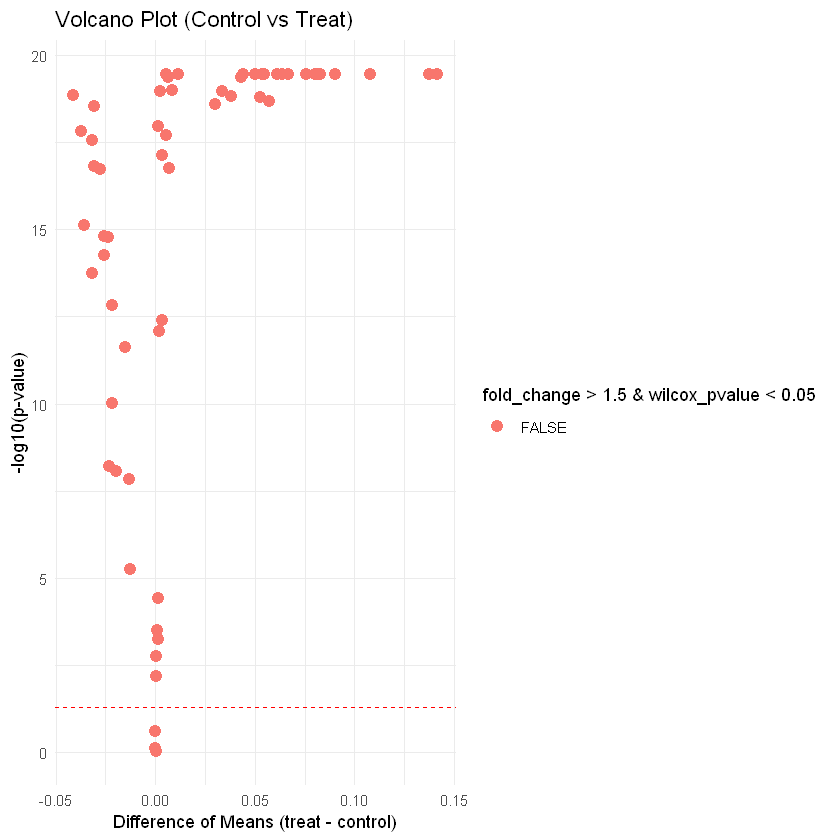

In [33]:
ggplot(results, aes(x = mean_diff, y = -log10(wilcox_pvalue))) +
  geom_point(aes(color = fold_change > 1.5 & wilcox_pvalue < 0.05), size = 3) +
  geom_hline(yintercept = -log10(0.05), linetype = "dashed", color = "red") +
  labs(title = "Volcano Plot (Control vs Treat)",
       x = "Difference of Means (treat - control)",
       y = "-log10(p-value)") +
  theme_minimal()

In [32]:
metaExp <- 'PerformanceTest3'

In [33]:
in_path <- "D://FILES/work/Sensor/ISensors_data/"
microarr_path <- paste0(in_path, 'Auxin_transcriptoms/microarrays/for stat/seurat_auxin_microarrays_', metaExp, '.rds')

In [34]:
seurat_obj <- readRDS(microarr_path)

In [22]:
iSensor_test <- readRDS(paste0('out-dev/stat/PerformanceTest3/', 'iSensor_obj.rds'))

In [35]:
as_numeric_self <- function(vec) {
    vecRes <- c()
    for (val in vec){
        if (val == '05') {
            vecRes <- c(vecRes, 0.5)
        } else {
            vecRes <- c(vecRes, as.numeric(val))
        }
    }
    return(vecRes)
}

In [36]:
retrieve_fenotype <- function(namesVec) {
    fenoLst <- list()
    for (metaInfo in colnames(seurat_obj@meta.data)[-c(1, 2, 3)]) {
        fenoLst[[metaInfo]] <- seurat_obj@meta.data[namesVec,][[metaInfo]]
    }
    if ('Duration' %in% colnames(seurat_obj@meta.data)[-c(1, 2, 3)]) {
        fenoLst[['Duration']] <- unlist(strsplit(fenoLst[['Duration']], 'h'))
    }
    return(fenoLst)
}

In [38]:
iSensorData <- t(iSensor_test$Signals[[signalType]])

In [39]:
iSensorData_info <- retrieve_fenotype(colnames(iSensorData))
iSensorData_info$Sample <- as.character(seurat_obj@meta.data[['orig.ident']])

In [40]:
iSensorData_info

$Concentration
 [1] "5"  "5"  "5"  "5"  "5"  "5"  "10" "10" "10" "10" "5"  "5"  "5"  "5"  "5" 
[16] "5"  "1"  "1"  "1"  "1"  "1"  "1"  "10" "10" "10" "10" "10" "10"

$Sample
 [1] "control" "control" "control" "treat"   "treat"   "treat"   "control"
 [8] "control" "treat"   "treat"   "control" "control" "control" "treat"  
[15] "treat"   "treat"   "control" "control" "control" "treat"   "treat"  
[22] "treat"   "control" "control" "control" "treat"   "treat"   "treat"

In [41]:
activeFeno <- 'Concentration'

In [42]:
fenoVecNotMean <- iSensorData_info[[activeFeno]]
fenoVecNotMean[which(iSensorData_info$Sample == 'control')] <- '0'
fenoVecNotMean <- as_numeric_self(fenoVecNotMean)

In [49]:
fenoVecNotMean

[1]  0  0  0  5  5  5  0  0 10 10  0  0  0  5  5  5  0  0  0  1  1  1  0  0  0
[26] 10 10 10

In [51]:
panelSignal <- iSensorData['AT_aux_trans_IAA',]

In [60]:
# Создаем датафрейм
df <- data.frame(
  x = fenoVecNotMean,  # ось X
  y = panelSignal      # ось Y
)

`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"семейство шрифтов не найдено в базе данных шрифтов Windows"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"семейство шрифтов не найдено в базе данных шрифтов Windows"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"семейство шрифтов не найдено в базе данных шрифтов Windows"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"семейство шрифтов не найдено в базе данных шрифтов Windows"


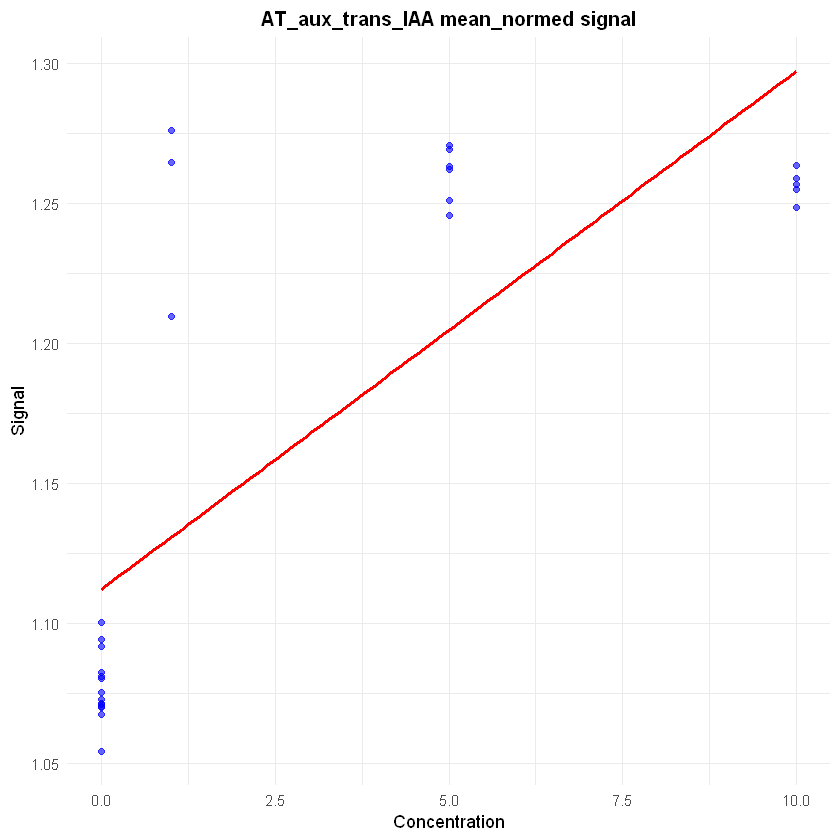

In [65]:
# Рисуем график
ggplot(df, aes(x = x, y = y)) +
  geom_point(color = "blue", alpha = 0.6) +  # точки
  geom_smooth(method = "lm", color = "red", se = FALSE) +  # линия тренда с доверительным интервалом
  labs(
    title = paste0("AT_aux_trans_IAA ",signalType ," signal"),
    x = "Concentration",
    y = "Signal"
  ) +
  theme_minimal() +
theme(
  plot.title = element_text(
    hjust = 0.5,           # выравнивание по центру
    size = 12,              # размер шрифта
    face = "bold",          # жирный шрифт
    family = "Times New Roman"  # шрифт (если нужен)
  )
)

In [69]:
# Указываем breaks и labels явно
p2 <- ggplot(df, aes(x = x, y = y)) +
  geom_point(color = "blue", alpha = 0.6) +
  geom_smooth(method = "lm", color = "red", se = FALSE) +
  scale_x_continuous(
    breaks = c(0, 1, 5, 10),  # где ставить метки
    labels = c("0", "1", "5", "10")  # что писать (можно менять)
  ) +
  labs(
    title = paste0("AT_aux_trans_IAA ",signalType ," signal"),
    x = "Concentration, uM",
    y = "Signal"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

In [70]:
ggsave(paste0('out-dev/pics/', 'signal_',signalType,'_1.png'), 
       plot = p2,
       width = 12,        # Ширина в дюймах (можно увеличить для большего места)
       height = 12,        # Высота в дюймах
       dpi = 300,         # Разрешение (300 для печати)
       bg = "white")      # Фон (прозрачный будет если "transparent")

`geom_smooth()` using formula = 'y ~ x'


`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at -0.05"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 5.05"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 25"


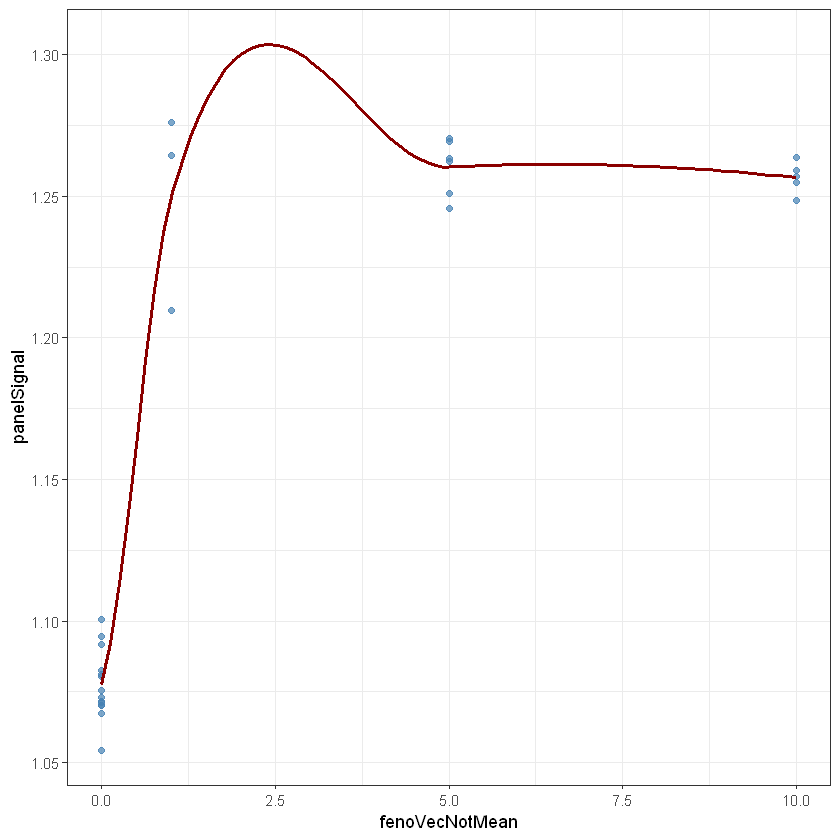

In [55]:
ggplot(df, aes(x = x, y = y)) +
  geom_point(color = "steelblue", alpha = 0.7) +
  geom_smooth(method = "loess", color = "darkred", se = FALSE) +  # без доверительного интервала
  labs(x = "fenoVecNotMean", y = "panelSignal") +
  theme_bw()

`geom_smooth()` using formula = 'y ~ x'


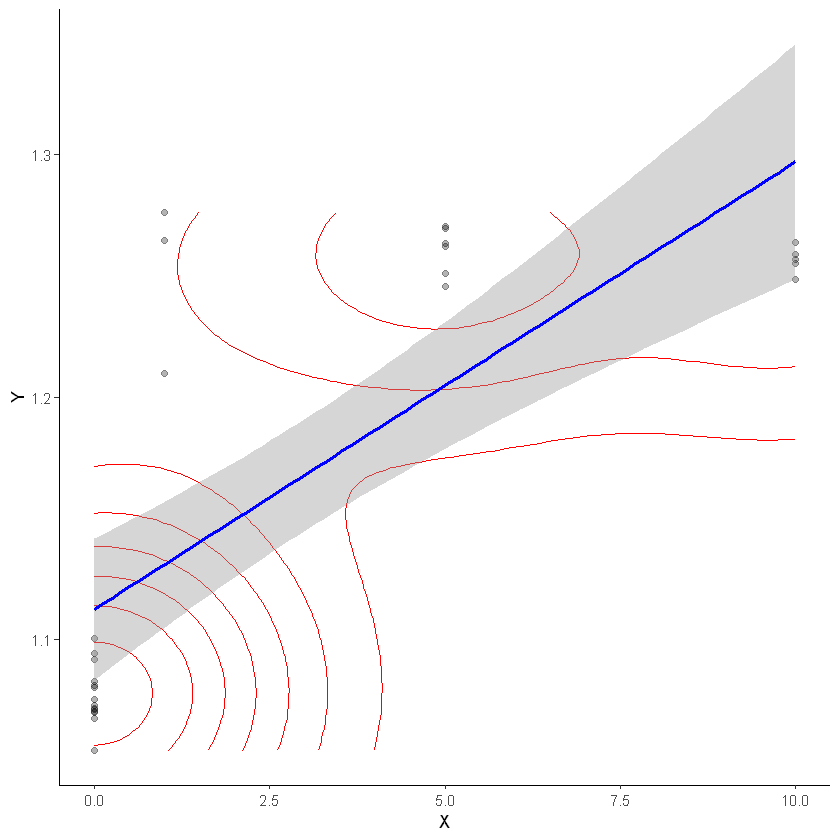

In [56]:
ggplot(df, aes(x = x, y = y)) +
  geom_point(alpha = 0.3, color = "black") +  # полупрозрачные точки
  geom_density_2d(color = "red") +            # линии плотности
  geom_smooth(method = "lm", color = "blue") +
  labs(x = "X", y = "Y") +
  theme_classic()

#### umap-ы

In [2]:
library(Seurat)
library(ggplot2)
library(iSensor)
library(RColorBrewer)

In [3]:
illustr_dir <- 'illustrations/'

In [18]:
hex_colors <- c("#f46d43", "#74add1")

In [171]:
rawSeurObj <- readRDS(paste0(illustr_dir, "seurat_auxin_microarrays_no_cb_raw.rds"))

In [68]:
reduct <- 'umap'

In [ ]:
# DimPlot(seurat_obj, reduction = "umap", group.by = "Tissue", cols=brewer.pal(n = 4, name = "RdYlBu"))

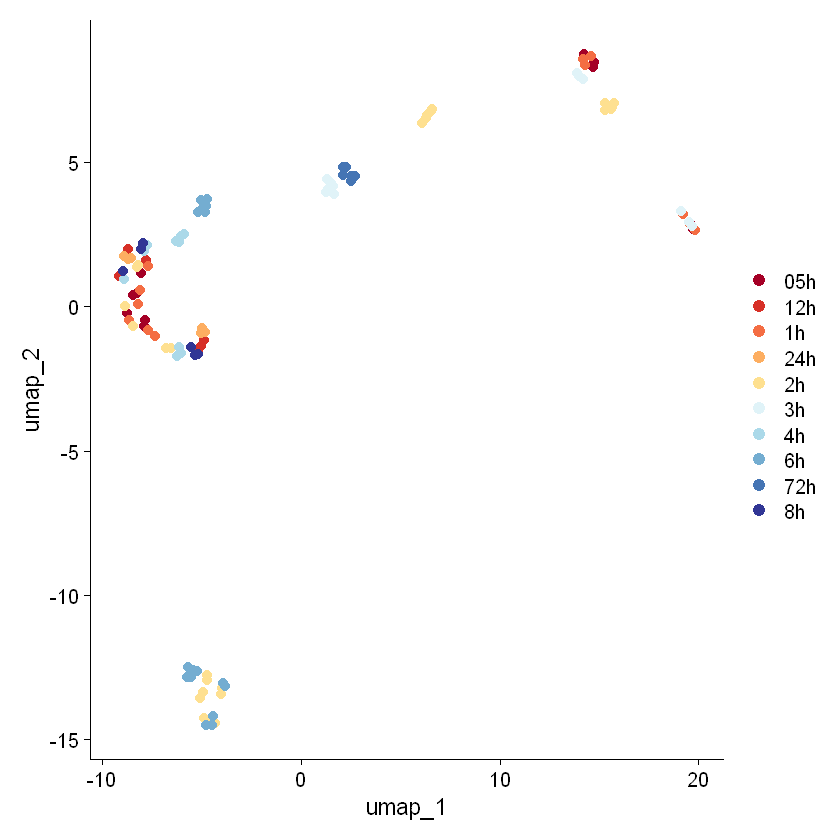

In [69]:
p <- DimPlot(rawSeurObj, reduction = reduct, group.by = "Duration", pt.size = 2.5, cols=brewer.pal(n = 10, name = "RdYlBu")) + ggtitle(NULL)
p

In [70]:
ggsave(paste0(illustr_dir, reduct, '/1/', reduct, '_aux_microarr_raw_duration.png'), plot = p, width = 8, height = 8)

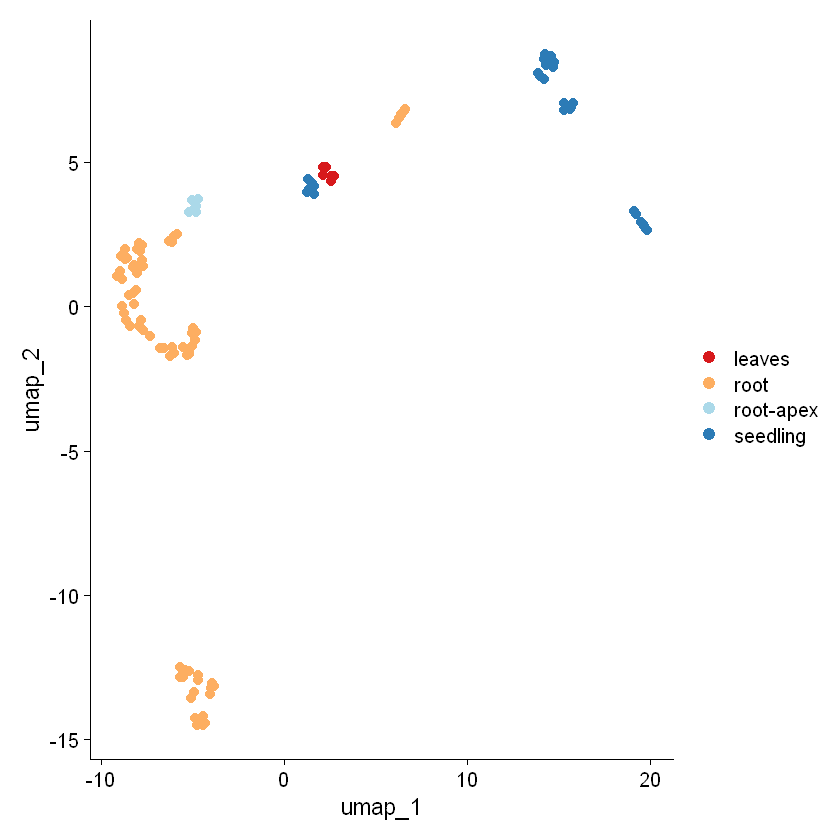

In [71]:
p <- DimPlot(rawSeurObj, reduction = reduct, group.by = "Tissue", pt.size = 2.5, cols=brewer.pal(n = 4, name = "RdYlBu")) + ggtitle(NULL)
p

In [72]:
ggsave(paste0(illustr_dir, reduct, '/1/', reduct, '_aux_microarr_raw_tissue.png'), plot = p, width = 8, height = 8)

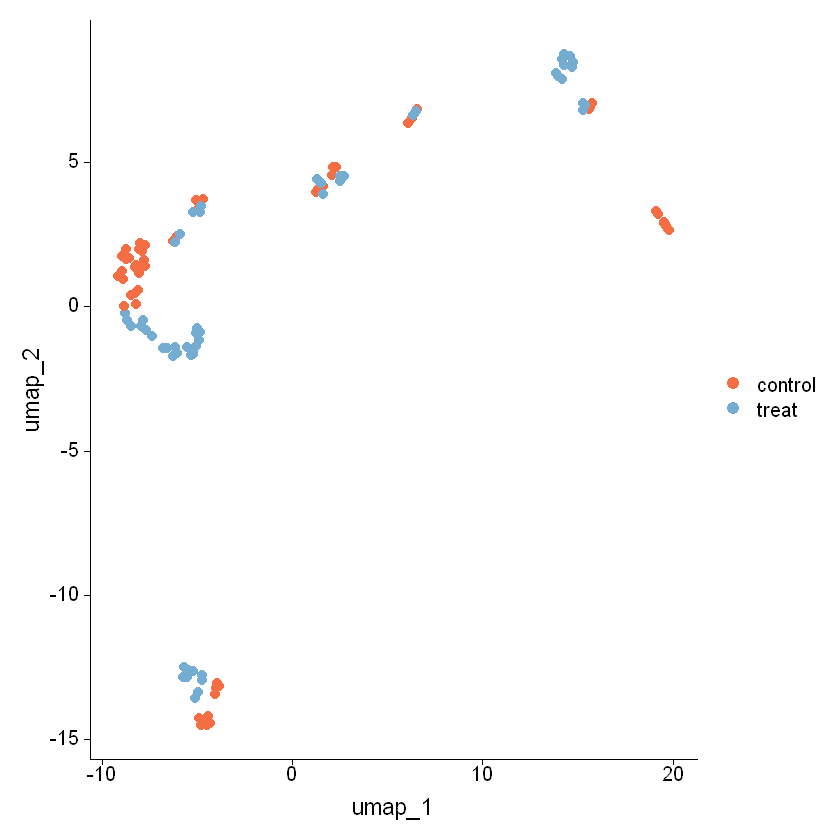

In [73]:
p <- DimPlot(rawSeurObj, reduction = reduct, group.by = "Type", pt.size = 2.5, cols=hex_colors) + ggtitle(NULL)
p

In [74]:
ggsave(paste0(illustr_dir, reduct, '/1/', reduct, '_aux_microarr_raw_type.png'), plot = p, width = 8, height = 8)

##### batch data

In [36]:
batchSeurObj <- readRDS(paste0(illustr_dir, "seurat_auxin_microarrays_no_cb.rds"))

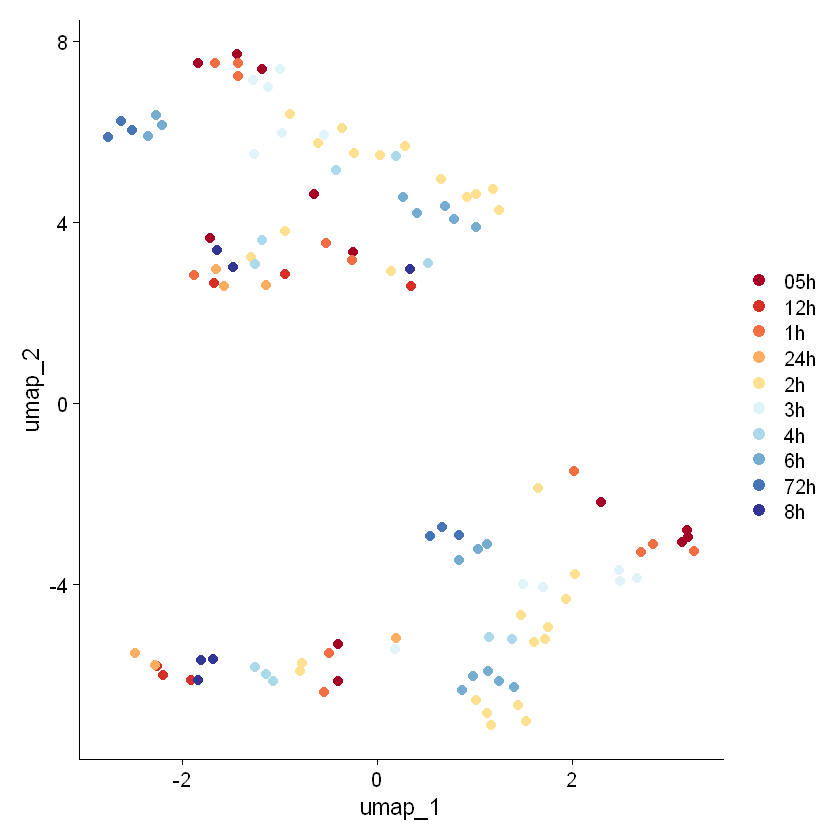

In [75]:
p <- DimPlot(batchSeurObj, reduction = reduct, group.by = "Duration", pt.size = 2.5, cols=brewer.pal(n = 10, name = "RdYlBu")) + ggtitle(NULL)
p

In [76]:
ggsave(paste0(illustr_dir, reduct, '/2/', reduct, '_aux_microarr_batch_duration.png'), plot = p, width = 8, height = 8)

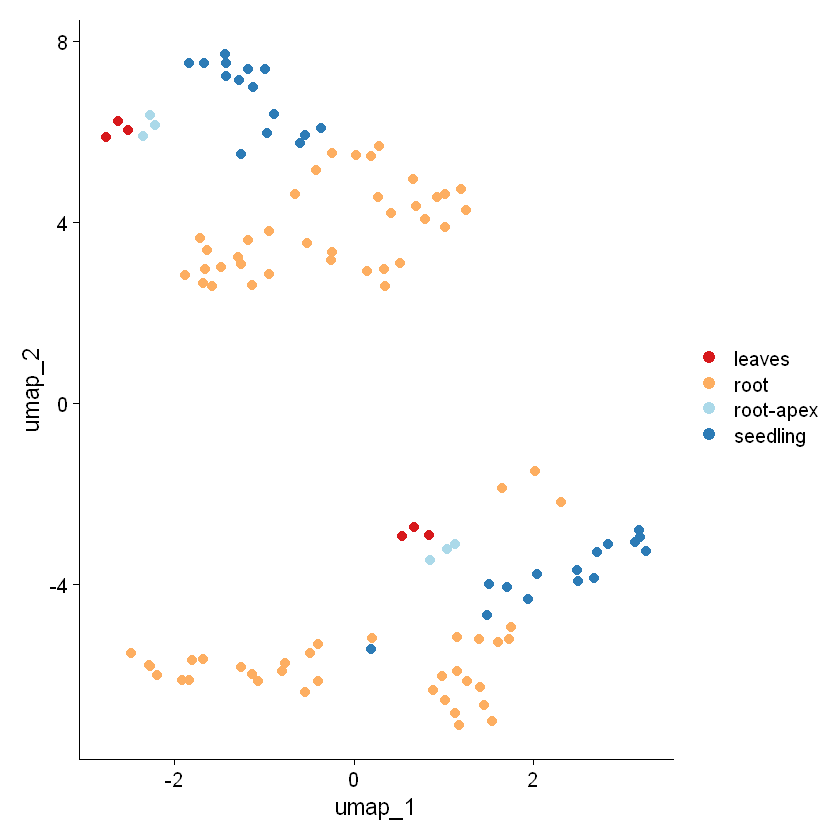

In [77]:
p <- DimPlot(batchSeurObj, reduction = reduct, group.by = "Tissue", pt.size = 2.5, cols=brewer.pal(n = 4, name = "RdYlBu")) + ggtitle(NULL)
p

In [78]:
ggsave(paste0(illustr_dir, reduct, '/2/', reduct, '_aux_microarr_batch_tissue.png'), plot = p, width = 8, height = 8)

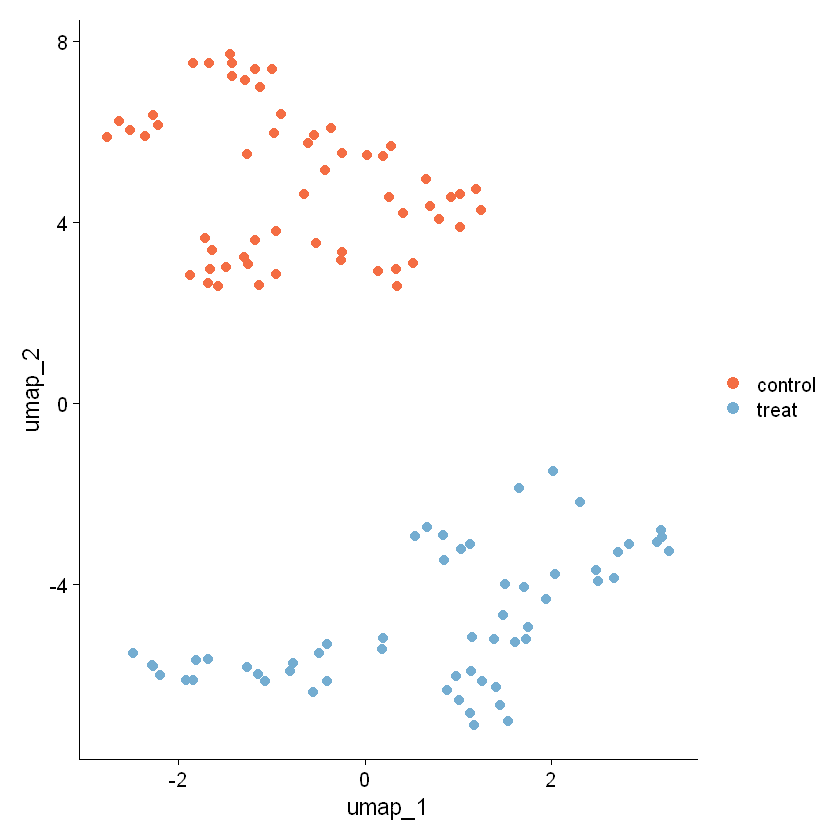

In [79]:
p <- DimPlot(batchSeurObj, reduction = reduct, group.by = "Type", pt.size = 2.5, cols=hex_colors) + ggtitle(NULL)
p

In [80]:
ggsave(paste0(illustr_dir, reduct, '/2/', reduct, '_aux_microarr_batch_type.png'), plot = p, width = 8, height = 8)

In [172]:
batchSeurObj <- iSensor_pipeline(seuratObject=batchSeurObj, species = NULL, hormone = NULL, type = NULL, metaPanels = NULL)

allSpec_allHorm_allType  panel preset will be used 
  |==================================================| 100%
mean_normed signal was calculated


Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"
Warning message:
"Different cells and/or features from existing assay iSensor_mean_normed"


In [197]:
rownames(batchSeurObj@assays$iSensor_mean_normed@counts)

[1] "AT-aux-cis-DR5-ARF1"              "AT-aux-cis-DR5-ARF2"             
 [3] "AT-aux-cis-DR5-ARF3"              "AT-aux-cis-DR5-ARF5-1"           
 [5] "AT-aux-cis-DR5-ARF5-2"            "AT-aux-cis-DR5-ARF5syn"          
 [7] "AT-aux-cis-DR5-ARF6"              "AT-aux-cis-DR5-ARF8"             
 [9] "AT-aux-cis-DR5-TGTCNN"            "AT-aux-cis-IR8-ARF1"             
[11] "AT-aux-cis-IR8-ARF2"              "AT-aux-cis-IR8-ARF3"             
[13] "AT-aux-cis-IR8-ARF5-1"            "AT-aux-cis-IR8-ARF5-2"           
[15] "AT-aux-cis-IR8-ARF5syn"           "AT-aux-cis-IR8-ARF6"             
[17] "AT-aux-cis-IR8-ARF8"              "AT-aux-cis-IR8-TGTCNN"           
[19] "AT-aux-cistrans-DR5-ARF1-down"    "AT-aux-cistrans-DR5-ARF1-up"     
[21] "AT-aux-cistrans-DR5-ARF2-down"    "AT-aux-cistrans-DR5-ARF2-up"     
[23] "AT-aux-cistrans-DR5-ARF3-down"    "AT-aux-cistrans-DR5-ARF3-up"     
[25] "AT-aux-cistrans-DR5-ARF5-1-down"  "AT-aux-cistrans-DR5-ARF5-1-up"   
[27] "AT-aux-cistrans-DR5-ARF5-2-down"  "AT-aux-cistrans-DR5-ARF5-2-up"   
[29] "AT-aux-cistrans-DR5-ARF5syn-down" "AT-aux-cistrans-DR5-ARF5syn-up"  
[31] "AT-aux-cistrans-DR5-ARF6-down"    "AT-aux-cistrans-DR5-ARF6-up"     
[33] "AT-aux-cistrans-DR5-ARF8-down"    "AT-aux-cistrans-DR5-ARF8-up"     
[35] "AT-aux-cistrans-DR5-TGTCNN-down"  "AT-aux-cistrans-DR5-TGTCNN-up"   
[37] "AT-aux-cistrans-IR8-ARF1-down"    "AT-aux-cistrans-IR8-ARF1-up"     
[39] "AT-aux-cistrans-IR8-ARF2-down"    "AT-aux-cistrans-IR8-ARF2-up"     
[41] "AT-aux-cistrans-IR8-ARF3-down"    "AT-aux-cistrans-IR8-ARF3-up"     
[43] "AT-aux-cistrans-IR8-ARF5-1-down"  "AT-aux-cistrans-IR8-ARF5-1-up"   
[45] "AT-aux-cistrans-IR8-ARF5-2-down"  "AT-aux-cistrans-IR8-ARF5-2-up"   
[47] "AT-aux-cistrans-IR8-ARF5syn-down" "AT-aux-cistrans-IR8-ARF5syn-up"  
[49] "AT-aux-cistrans-IR8-ARF6-down"    "AT-aux-cistrans-IR8-ARF6-up"     
[51] "AT-aux-cistrans-IR8-ARF8-down"    "AT-aux-cistrans-IR8-ARF8-up"     
[53] "AT-aux-cistrans-IR8-TGTCNN-down"  "AT-aux-cistrans-IR8-TGTCNN-up"   
[55] "AT-aux-trans-A-ARF"               "AT-aux-trans-ARF"                
[57] "AT-aux-trans-EffluxInflux"        "AT-aux-trans-IAA"                
[59] "AT-aux-trans-Receptors"           "AT-aux-trans-Synthesis"          
[61] "AT-aux-trans-Transport"           "majortrend"                      
[63] "random1"                          "random2"

In [127]:
transFeatures <- sapply(rownames(batchSeurObj@assays$iSensor_mean_normed@data), function(x) {
    if ('trans' %in% strsplit(x, '-')[[1]]) return(TRUE) else return(FALSE)
})
cisFeatures <- sapply(rownames(batchSeurObj@assays$iSensor_mean_normed@data), function(x) {
    if ('cis' %in% strsplit(x, '-')[[1]]) return(TRUE) else return(FALSE)
})
cistransFeatures <- sapply(rownames(batchSeurObj@assays$iSensor_mean_normed@data), function(x) {
    if ('cistrans' %in% strsplit(x, '-')[[1]]) return(TRUE) else return(FALSE)
})

In [129]:
rownames(batchSeurObj@assays$iSensor_mean_normed@data)[cisFeatures]

[1] "AT-aux-cis-DR5-ARF1"    "AT-aux-cis-DR5-ARF2"    "AT-aux-cis-DR5-ARF3"   
 [4] "AT-aux-cis-DR5-ARF5-1"  "AT-aux-cis-DR5-ARF5-2"  "AT-aux-cis-DR5-ARF5syn"
 [7] "AT-aux-cis-DR5-ARF6"    "AT-aux-cis-DR5-ARF8"    "AT-aux-cis-DR5-TGTCNN" 
[10] "AT-aux-cis-IR8-ARF1"    "AT-aux-cis-IR8-ARF2"    "AT-aux-cis-IR8-ARF3"   
[13] "AT-aux-cis-IR8-ARF5-1"  "AT-aux-cis-IR8-ARF5-2"  "AT-aux-cis-IR8-ARF5syn"
[16] "AT-aux-cis-IR8-ARF6"    "AT-aux-cis-IR8-ARF8"    "AT-aux-cis-IR8-TGTCNN"

In [101]:
features_to_average <- c("AT-aux-trans-Synthesis", "AT-aux-trans-Transport", "AT-aux-trans-IAA")
average_values <- colMeans(batchSeurObj@assays$iSensor_mean_normed@counts[features_to_average, ])

In [130]:
average_values <- colMeans(batchSeurObj@assays$iSensor_mean_normed@counts[transFeatures, ])
batchSeurObj$transFeatures <- average_values
average_values <- colMeans(batchSeurObj@assays$iSensor_mean_normed@counts[cistransFeatures, ])
batchSeurObj$cistransFeatures <- average_values
average_values <- colMeans(batchSeurObj@assays$iSensor_mean_normed@counts[cisFeatures, ])
batchSeurObj$cisFeatures <- average_values

Warning message:
"Could not find R2D2 in the default search locations, found in 'iSensor_mean_normed' assay instead"


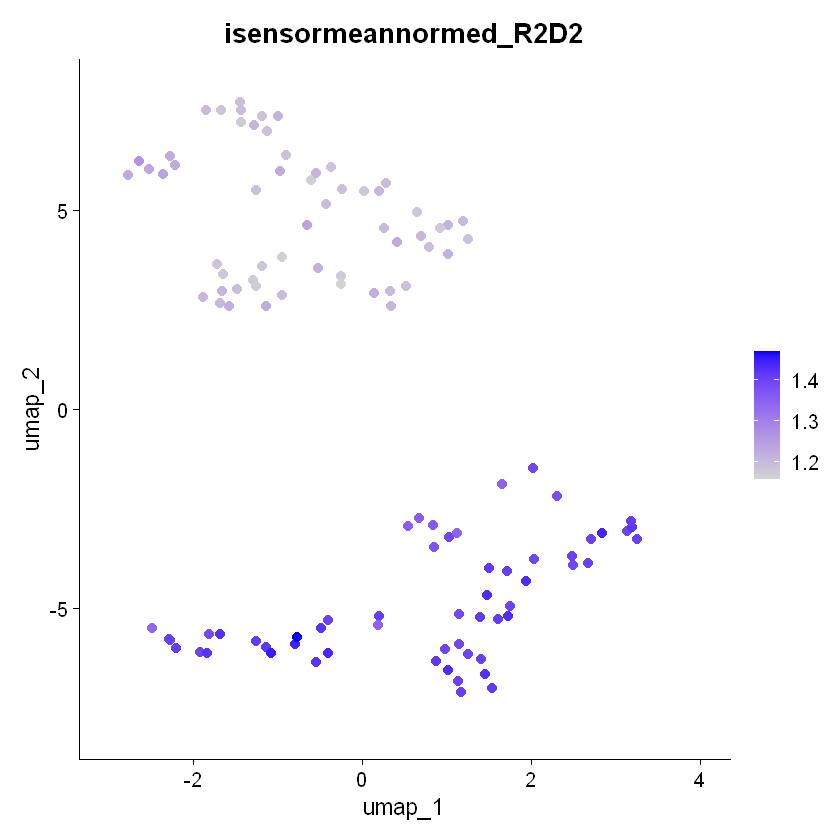

In [106]:
FeaturePlot(batchSeurObj, features = "R2D2", reduction = "umap", pt.size = 2.5)

In [153]:
reduct <- 'pca'

In [166]:
featureSample <- 'transFeatures'

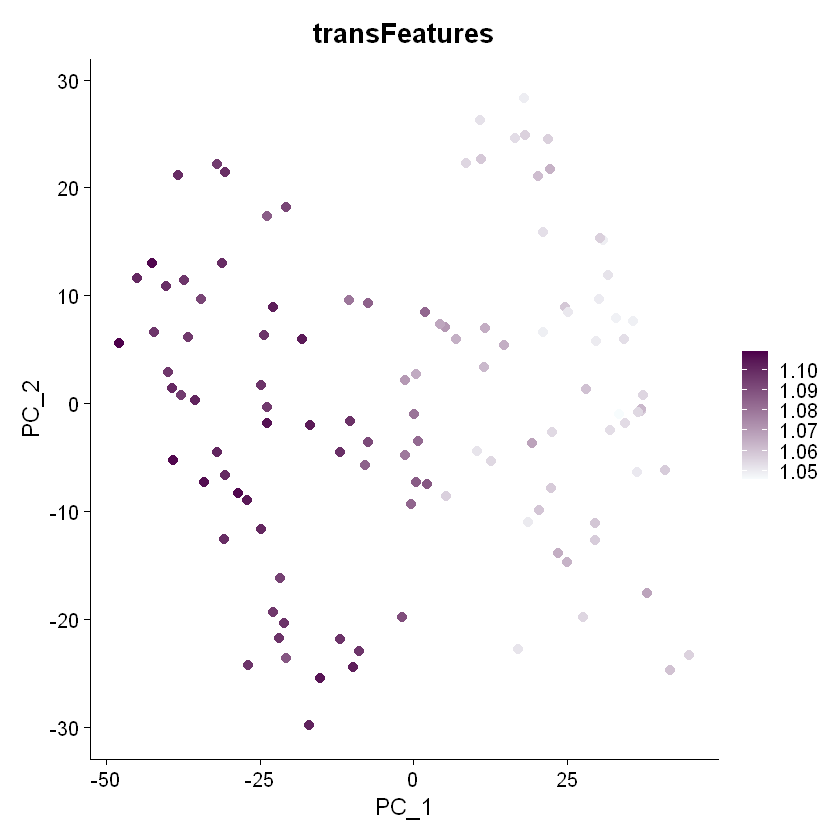

In [167]:
p <- FeaturePlot(batchSeurObj, features = featureSample, reduction = reduct, pt.size = 2.5, cols=c('#f7fcfd', '#4d004b')) + ggtitle(featureSample)
p

In [168]:
ggsave(paste0(illustr_dir, reduct, '/3/', reduct, '_aux_microarr_batch_',featureSample,'.png'), plot = p, width = 8, height = 8)